In [1]:
%matplotlib inline
import random as rand
import matplotlib.pyplot as plt

In [2]:
times=5000
size=20

In [3]:
def sign(input):
    if input>=0:
        return 1;
    else:
        return -1;

In [4]:
errorRatesRecord=[]
for i in range(times):
    #Generate the data
    x=[]
    y=[]
    for j in range(size):
        x.append(rand.uniform(-1,1))
        flip=rand.uniform(0,1)
        if x[j]<0:
            if flip>0.2:
                y.append(-1)
            else:
                y.append(1)
        else:
            if flip>0.2:
                y.append(1)
            else:
                y.append(-1)
    #Run the decision stump algorithm
    #print(x)
    x_sorted=sorted(x)
    x_median=[]
    for j in range(size-1):
        x_median.append((x_sorted[j]+x_sorted[j+1])/2)
    bestErrorTimes=size
    bestS=0
    bestTheta=0
    errorTimes=0
    count1=0
    for j in range(size):
        if y[j]==1:
            count1+=1
    if count1>size-count1:
        bestS=1
        bestTheta=-2
        bestErrorTimes=size-count1
    else:
        bestS=1
        bestTheta=2
        bestErrorTImes=count1
    for j in range(size-1):
        theta=x_median[j]
        for k in range(2):
            if k==0:
                s=1
            else:
                s=-1
            errorTimes=0
            for n in range(size):
                if s*sign(x[n]-theta)!=y[n]:
                    errorTimes+=1
            if errorTimes<bestErrorTimes:
                bestErrorTimes=errorTimes
                bestS=s
                bestTheta=theta
    #print("Ein:",bestErrorTimes/size)
    errorRatesRecord.append(bestErrorTimes/size)

In [5]:
print("Average Ein:",sum(errorRatesRecord)/times)

Average Ein: 0.16854000000000025


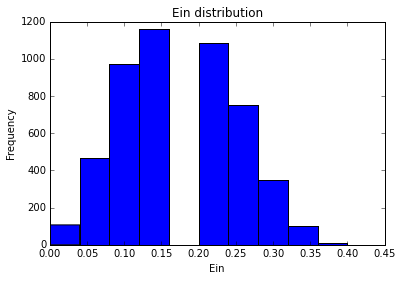

In [6]:
plt.hist(errorRatesRecord)
plt.title("Ein distribution")
plt.xlabel("Ein")
plt.ylabel("Frequency")
plt.show()